video link: 

In [2]:
#  setup Keras + plaidML
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [3]:
#  import keras modules and other librarys
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


In [11]:
# load dataset: train (60000) and test (10000)
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [12]:
# check the dataset dimension
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
#  index to actual label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  44,  73, 215, 171,
        125, 159, 169, 218, 221, 107,  65,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 142, 210, 183, 182, 248,
        167, 156, 223, 254, 163, 182, 208, 155,  81,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178, 178, 136, 139, 137, 163,
        167, 155, 153, 152, 153, 169, 144, 186, 184,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  27, 163, 161, 193, 177, 175, 118,
        136, 145, 126, 154, 161, 159, 187, 157, 168,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 121, 153, 137, 130, 158, 154, 184,
        181, 188, 175, 187, 127, 156, 137, 139, 147, 142,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 138, 177, 172, 189,  88, 131, 109,
        129, 106, 127,  97, 139, 125, 197, 222, 198,  98,   0,   0,   0,
          0,   0],
       [  

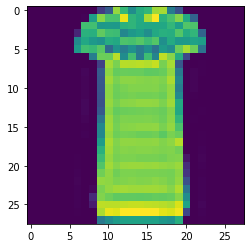

In [14]:
# demo one image
index = 323
plt.imshow(train_images[index])
class_names[train_labels[index]]
train_images[index]

In [9]:
#  normalize
train_images = train_images/255.0
test_images = test_images/255.0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  44,  73, 215, 171,
        125, 159, 169, 218, 221, 107,  65,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 142, 210, 183, 182, 248,
        167, 156, 223, 254, 163, 182, 208, 155,  81,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178, 178, 136, 139, 137, 163,
        167, 155, 153, 152, 153, 169, 144, 186, 184,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  27, 163, 161, 193, 177, 175, 118,
        136, 145, 126, 154, 161, 159, 187, 157, 168,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 121, 153, 137, 130, 158, 154, 184,
        181, 188, 175, 187, 127, 156, 137, 139, 147, 142,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 138, 177, 172, 189,  88, 131, 109,
        129, 106, 127,  97, 139, 125, 197, 222, 198,  98,   0,   0,   0,
          0,   0],
       [  

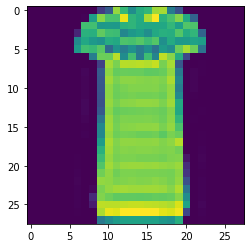

In [15]:
# demo the image again
plt.imshow(train_images[index])
train_images[index]

In [16]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = "relu"),
    Dense(10, activation = "softmax")
])

INFO:plaidml:Opening device "llvm_cpu.0"


In [17]:
model.compile(optimizer= 'RMSprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [18]:
model.fit(train_images, train_labels, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 8s 142us/step - loss: 17.2325 - acc: 0.7484
Epoch 2/2
60000/60000 [==============================] - 12s 208us/step - loss: 20.7698 - acc: 0.7805


In [23]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 115us/step


[0.4838809081077576, 0.8674]

In [25]:
model.save("week05_03_first_model.h5")